## Cost Matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
seed = 42

In [2]:
cost_matrix = np.array([[0, 5], [1, 0]])
print('Nếu tín dụng xấu được phân là xấu, cost = ', cost_matrix[0][0])
print('Nếu tín dụng xấu được phân là tốt, cost = ', cost_matrix[0][1])
print('Nếu tín dụng tốt được phân là xấu, cost = ', cost_matrix[1][0])
print('Nếu tín dụng tốt được phân là tốt, cost = ', cost_matrix[1][1])

Nếu tín dụng xấu được phân là xấu, cost =  0
Nếu tín dụng xấu được phân là tốt, cost =  5
Nếu tín dụng tốt được phân là xấu, cost =  1
Nếu tín dụng tốt được phân là tốt, cost =  0


## Data Loading & Exploring

In [13]:
data_array = np.genfromtxt('german.data-numeric')
data_frame = df = pd.DataFrame(data_array, columns = ['A' + str(i) for i in range(1, 25)] + ['label'])
# ban đầu nhãn là 1: good, 2: bad -> để đơn giản ta chuyển về 1: good, 0: bad
data_frame['label'] = data_frame['label'].replace(2, 0)
data_frame['label'] = data_frame['label'].astype(int)
data_frame

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,12.0,2.0,17.0,1.0,4.0,2.0,4.0,1.0,31.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
996,1.0,30.0,2.0,39.0,1.0,3.0,1.0,4.0,2.0,40.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
997,4.0,12.0,2.0,8.0,1.0,5.0,3.0,4.0,3.0,38.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
998,1.0,45.0,2.0,18.0,1.0,3.0,3.0,4.0,4.0,23.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1000 non-null   float64
 1   A2      1000 non-null   float64
 2   A3      1000 non-null   float64
 3   A4      1000 non-null   float64
 4   A5      1000 non-null   float64
 5   A6      1000 non-null   float64
 6   A7      1000 non-null   float64
 7   A8      1000 non-null   float64
 8   A9      1000 non-null   float64
 9   A10     1000 non-null   float64
 10  A11     1000 non-null   float64
 11  A12     1000 non-null   float64
 12  A13     1000 non-null   float64
 13  A14     1000 non-null   float64
 14  A15     1000 non-null   float64
 15  A16     1000 non-null   float64
 16  A17     1000 non-null   float64
 17  A18     1000 non-null   float64
 18  A19     1000 non-null   float64
 19  A20     1000 non-null   float64
 20  A21     1000 non-null   float64
 21  A22     1000 non-null   float64
 22  A

In [5]:
data_frame.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,...,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,0.700000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,...,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


## Data Visualization

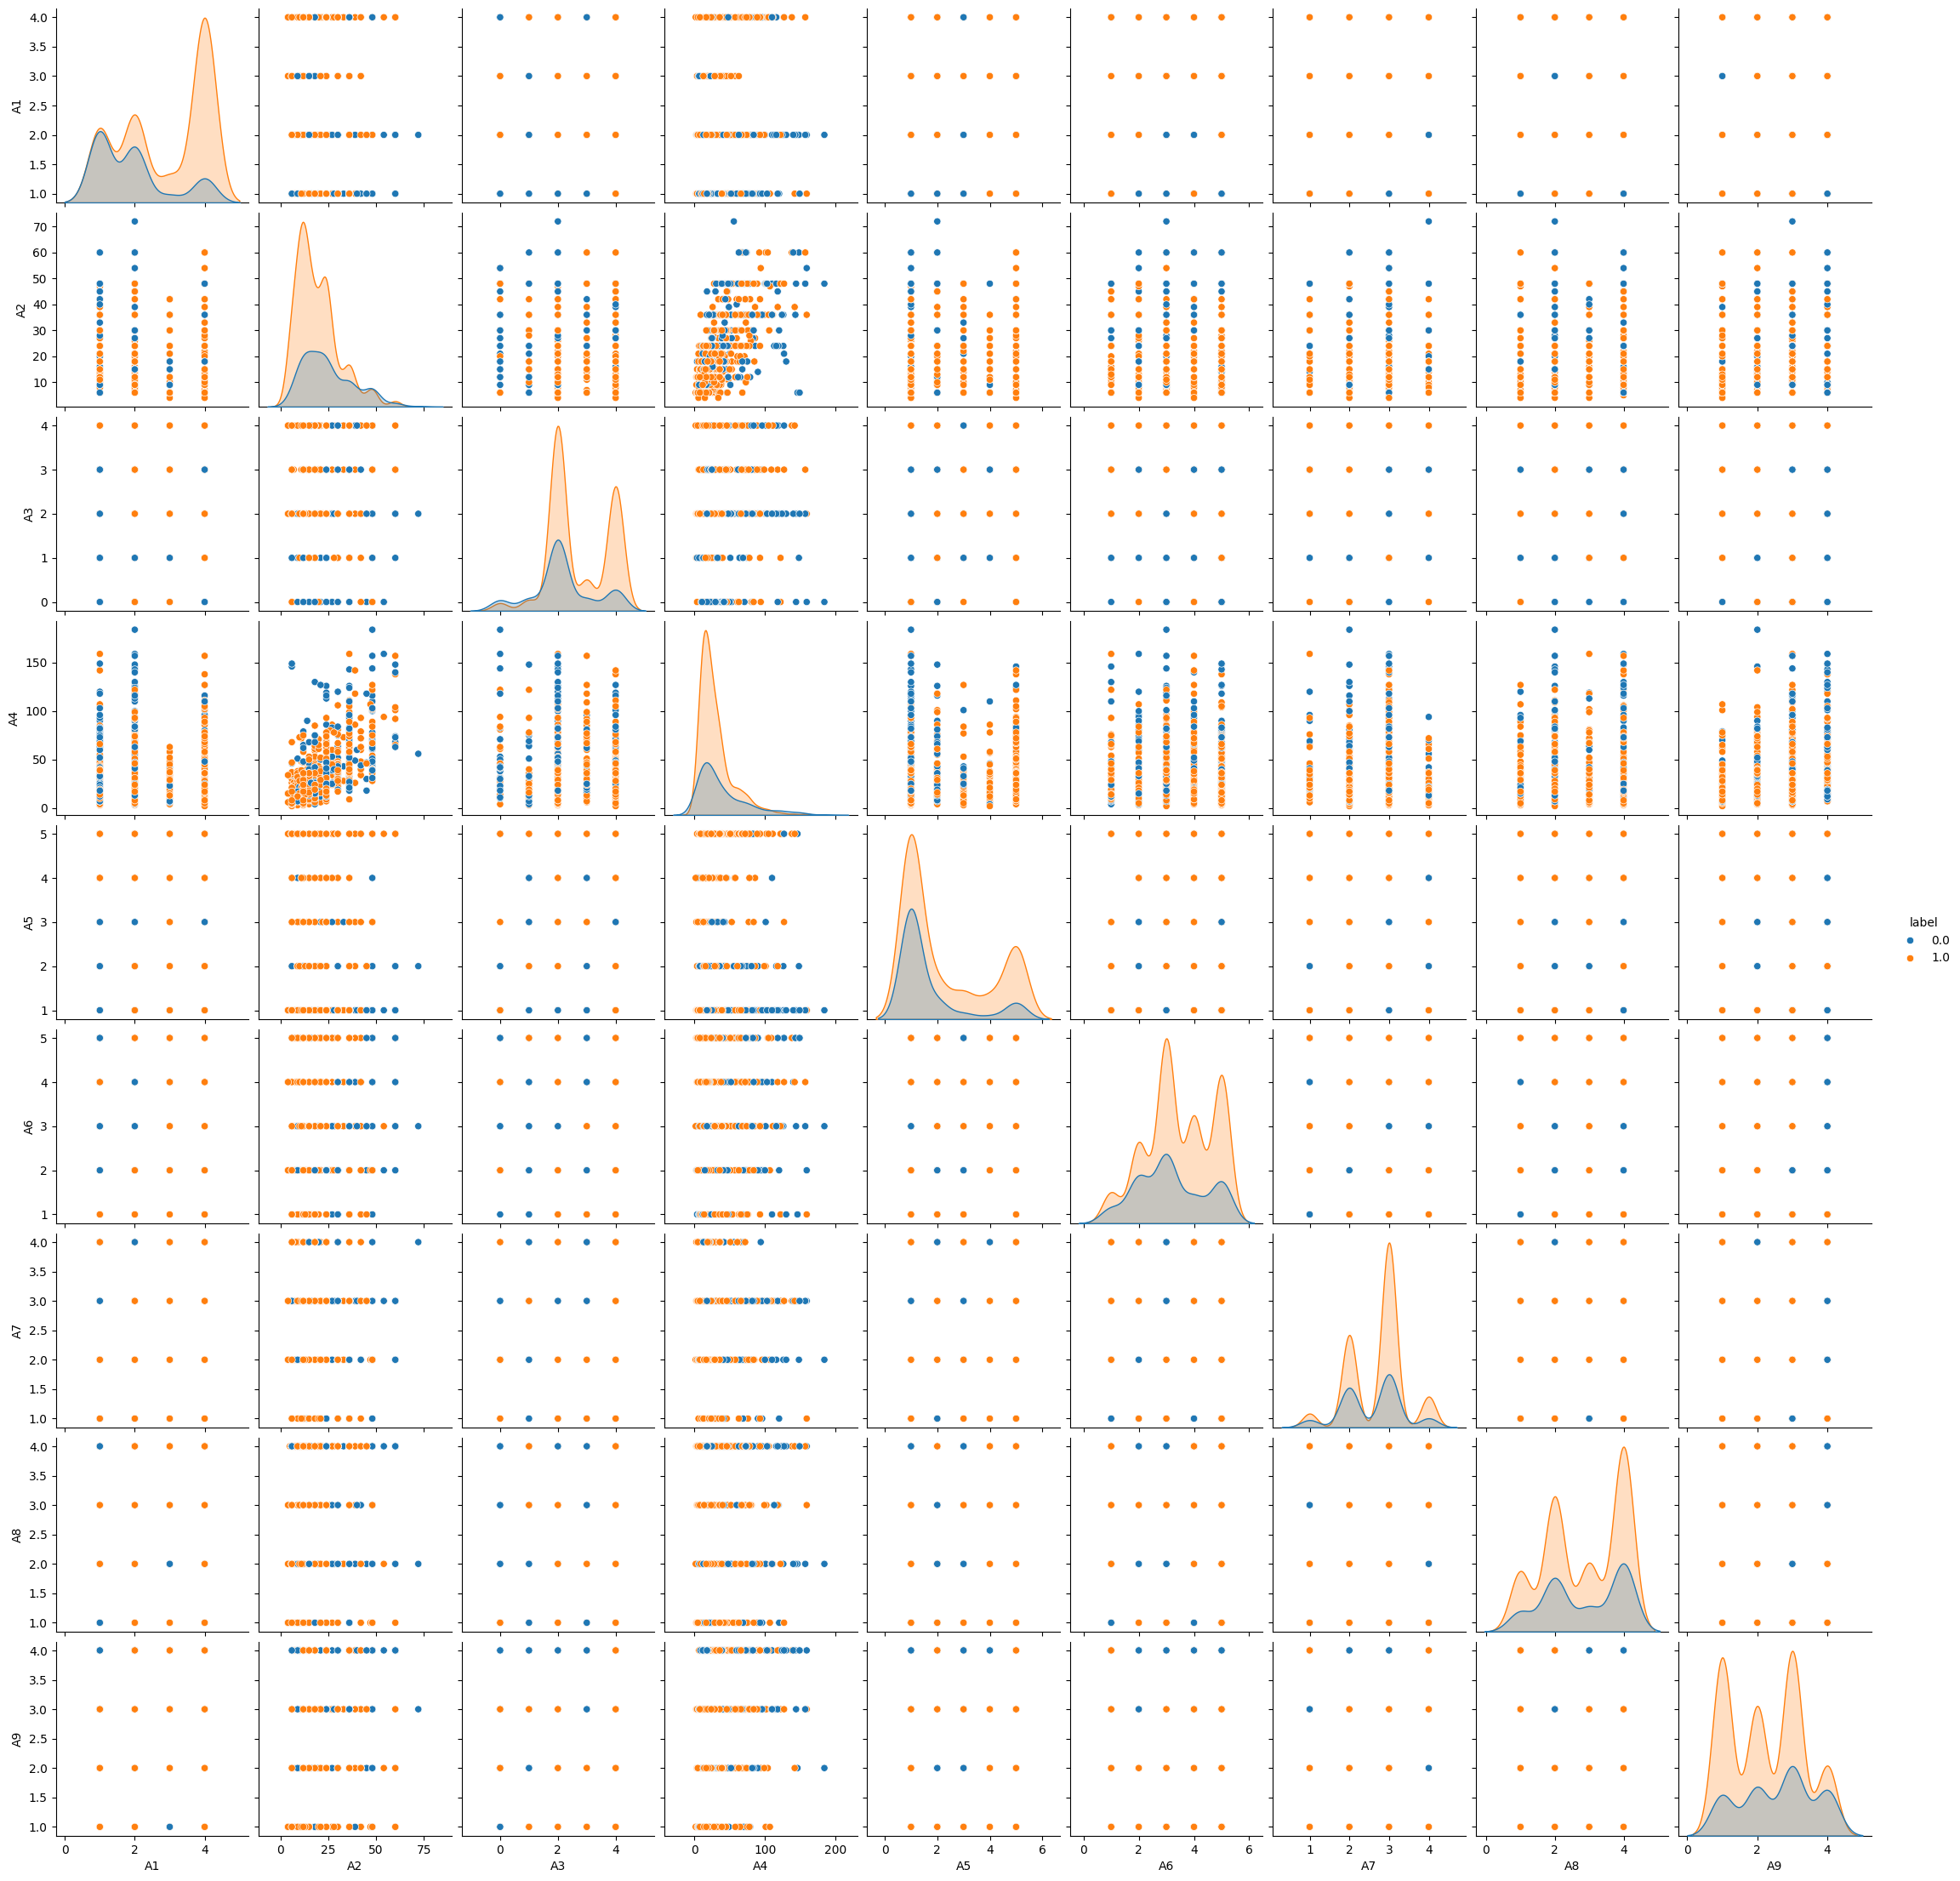

In [ ]:
sns.pairplot(data_frame, hue = 'label', vars=['A' + str(i) for i in range (1, 10)])

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_65508/3695794203.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_frame, x = 'label', palette = {'0': 'skyblue', '1': 'orange'})


<Axes: xlabel='label', ylabel='count'>

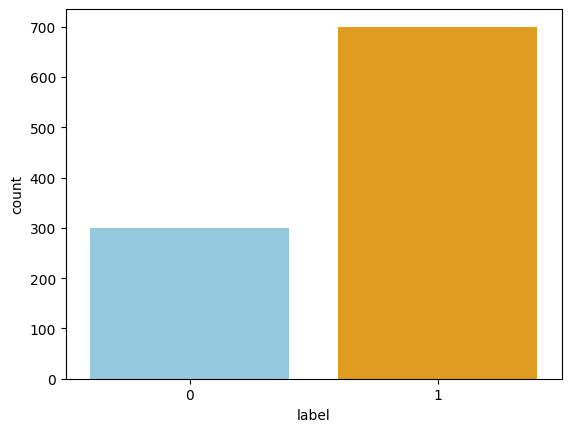

In [14]:
sns.countplot(data = data_frame, x = 'label', palette = {'0': 'skyblue', '1': 'orange'})

<Axes: >

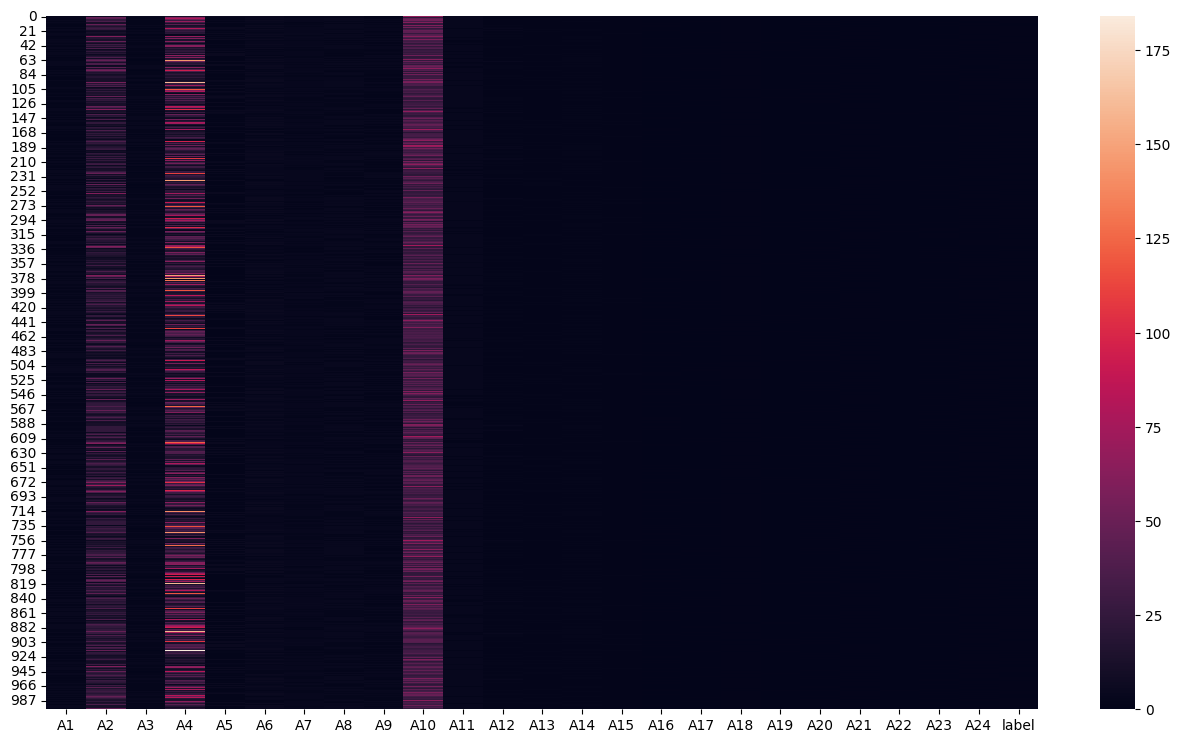

In [8]:
plt.figure(figsize=(16,9))
sns.heatmap(data_frame)

<Axes: >

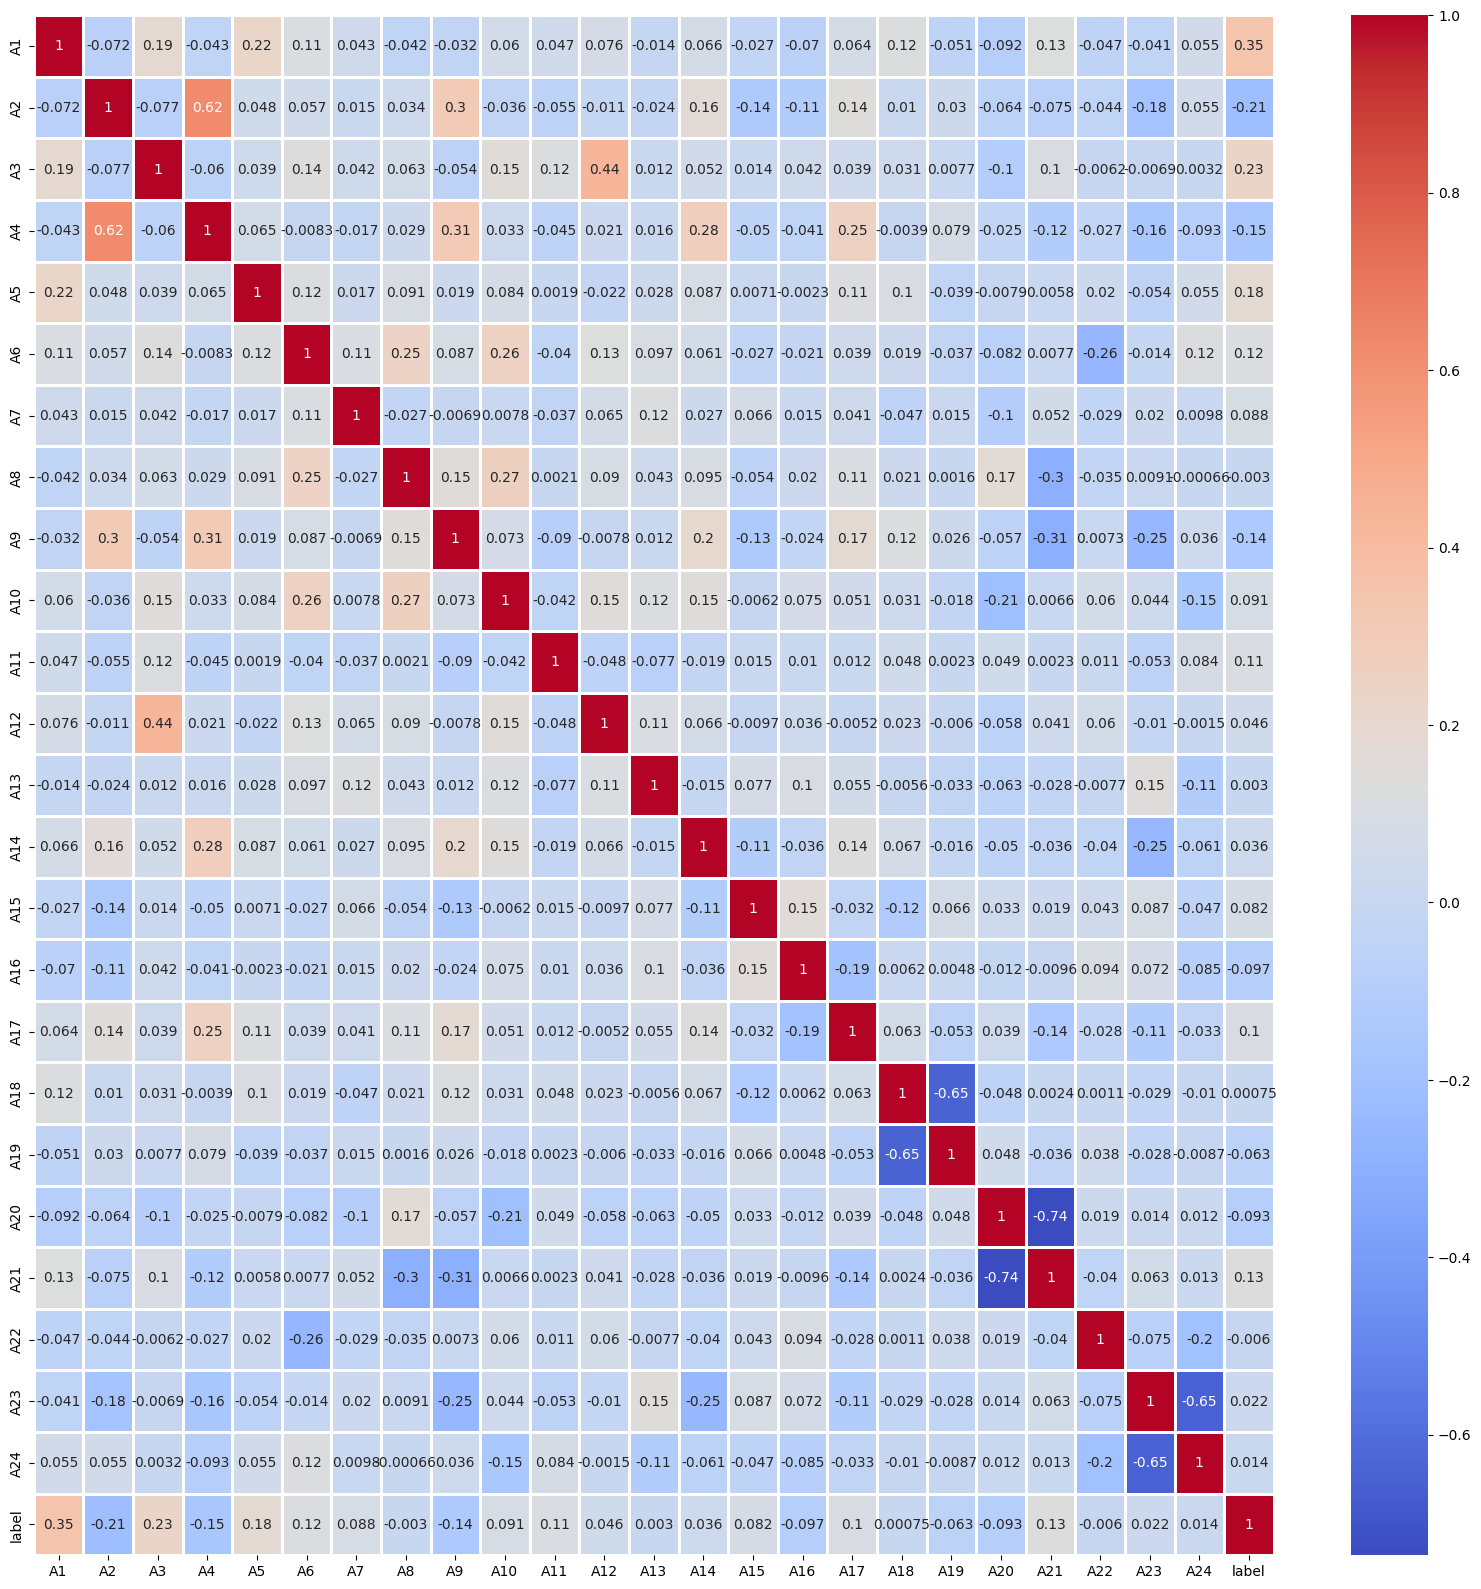

In [17]:
plt.figure(figsize = (20,20))
sns.heatmap(data_frame.corr(), annot = True, cmap = 'coolwarm', linewidths = 2)

## Data Preprocessing

In [ ]:
# Normaliza
X = data_frame.drop(['label'], axis = 1)
X = (X-X.min())/(X.max()-X.min())
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
0,0.000000,0.029412,1.00,0.054945,1.00,1.00,0.666667,1.000000,0.000000,0.857143,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.333333,0.647059,0.50,0.318681,0.00,0.50,0.333333,0.333333,0.000000,0.053571,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.000000,0.117647,1.00,0.104396,0.00,0.75,0.666667,0.666667,0.000000,0.535714,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.558824,0.50,0.423077,0.00,0.75,0.666667,1.000000,0.333333,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.294118,0.75,0.258242,0.00,0.50,0.666667,1.000000,1.000000,0.607143,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.082418,0.00,0.75,0.333333,1.000000,0.000000,0.214286,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.000000,0.382353,0.50,0.203297,0.00,0.50,0.000000,1.000000,0.333333,0.375000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,1.000000,0.117647,0.50,0.032967,0.00,1.00,0.666667,1.000000,0.666667,0.339286,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,0.000000,0.602941,0.50,0.087912,0.00,0.50,0.666667,1.000000,1.000000,0.071429,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
X.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,0.525667,0.248574,0.63625,0.168742,0.276250,0.596000,0.560667,0.615000,0.452667,0.295464,...,0.037000,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000
std,0.419213,0.177336,0.27078,0.155234,0.395006,0.302077,0.236027,0.367906,0.350070,0.203133,...,0.188856,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.000000,0.117647,0.50000,0.065934,0.000000,0.500000,0.333333,0.333333,0.000000,0.142857,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,0.333333,0.205882,0.50000,0.115385,0.000000,0.500000,0.666667,0.666667,0.333333,0.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000
75%,1.000000,0.294118,1.00000,0.208791,0.500000,1.000000,0.666667,1.000000,0.666667,0.410714,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000


<Axes: >

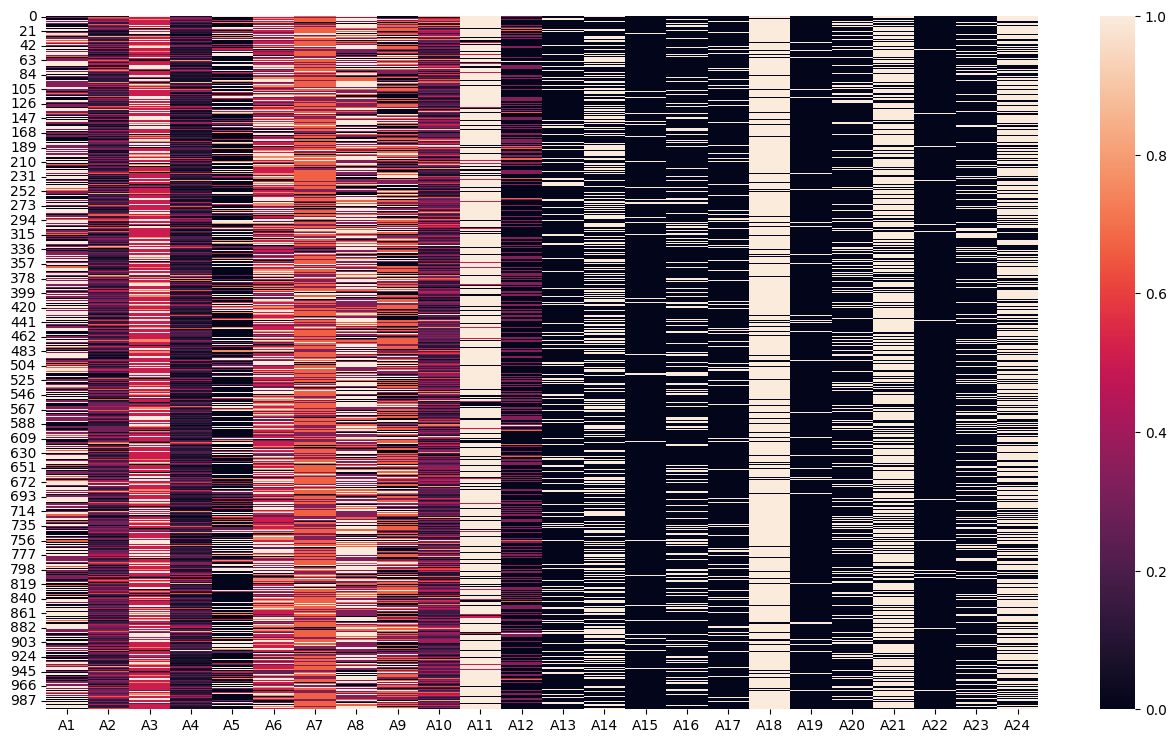

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(X)

In [21]:
y = data_frame['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Model Building & Training

In [32]:
## K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Model Testing & Evaluation

In [39]:
def cost(y_true, y_pred):
    true_pos = ((y_true == y_pred) & (y_true == 1.0)) * 0
    true_ne = ((y_true == y_pred) & (y_true == 0.0)) * 0
    false_ne = ((y_true != y_pred) & (y_true == 1.0)) * 1
    false_pos = ((y_true != y_pred) & (y_true == 0.0)) * 5
    return sum(true_pos + true_ne + false_pos + false_ne)/len(y_true)

In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("Testing...\n")
y_pred_knn = knn_classifier.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Cost: ', cost(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))


Testing...

Accuracy:  0.76
Cost:  0.86
Precision:  0.8
Recall:  0.8794326241134752


1. Lựa chọn số lượng láng giềng

In [41]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30]
models = []
for k in n_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)

Text(0.5, 1.0, 'Effect of number of neighbors')

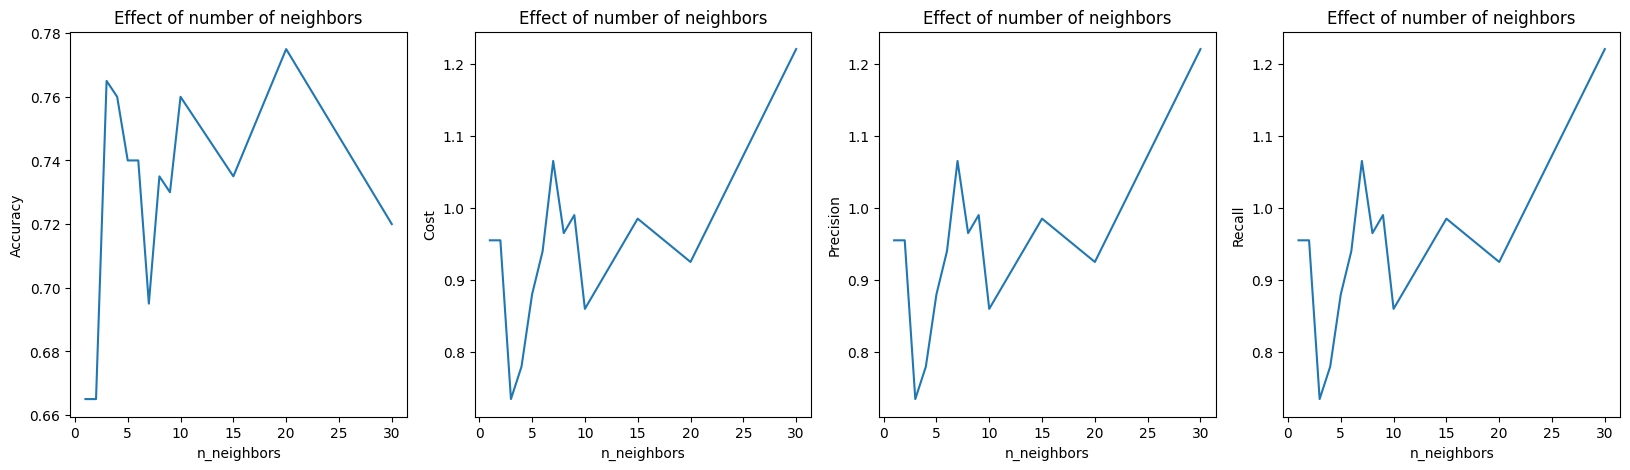

In [44]:
acc, pre, re, c = [], [], [], []
for model in models:
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    c.append(cost(y_test, y_pred))
    re.append(cost(y_test, y_pred))
    pre.append(cost(y_test, y_pred))


fig, axs = plt.subplots(1, 4, figsize = (20, 5))

axs[0].plot(n_neighbors, acc)
axs[0].set_xlabel("n_neighbors")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Effect of number of neighbors")

axs[1].plot(n_neighbors, c)
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("Cost")
axs[1].set_title("Effect of number of neighbors")

axs[2].plot(n_neighbors, pre)
axs[2].set_xlabel("n_neighbors")
axs[2].set_ylabel("Precision")
axs[2].set_title("Effect of number of neighbors")

axs[3].plot(n_neighbors, re)
axs[3].set_xlabel("n_neighbors")
axs[3].set_ylabel("Recall")
axs[3].set_title("Effect of number of neighbors")

2. Lựa chọn hàm khoảng cách

Text(0.5, 1.0, 'Ảnh hưởng của hàm tính khoảng cách')

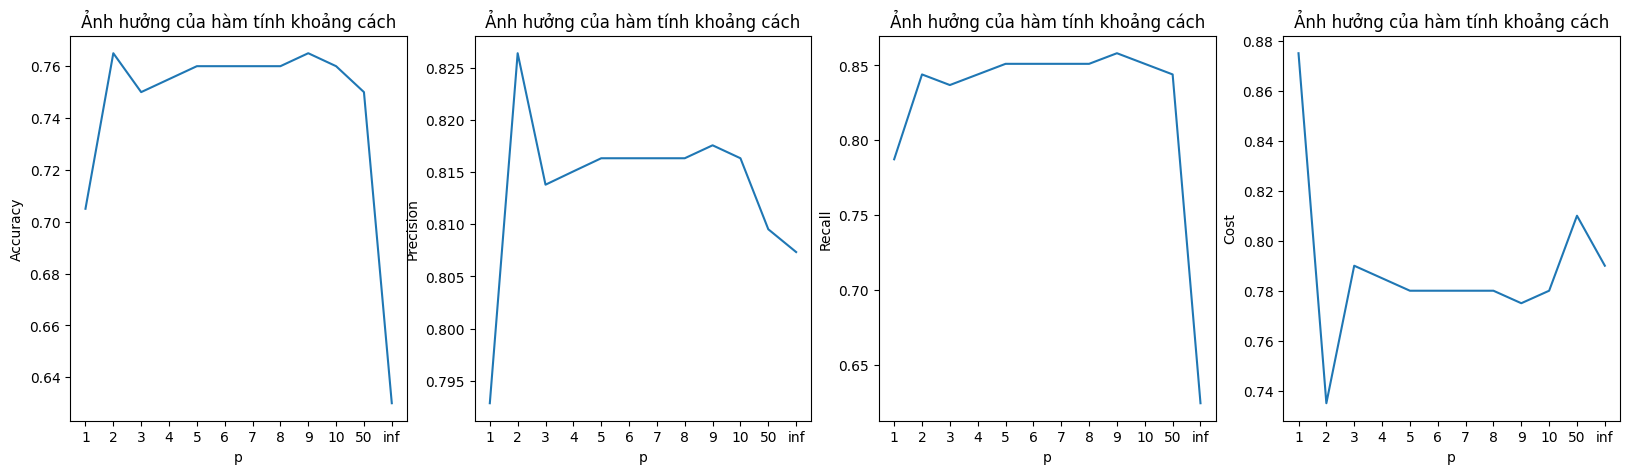

In [47]:
k = 3
models = []
ps = [1,2,3,4,5,6,7,8,9,10,50, 'inf']

for p in ps:
    if p == 'inf':
        metric = 'chebyshev'
        p = 2
    else:
        metric = 'minkowski'
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = metric, p = p, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)

acc, pre, re, c = [], [], [], []
for model in models:
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    c.append(cost(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots(1, 4, figsize = (20, 5))
axs[0].plot(ps, acc)
axs[0].set_xlabel("p")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của hàm tính khoảng cách")

axs[1].plot(ps, pre)
axs[1].set_xlabel("p")
axs[1].set_ylabel("Precision")
axs[1].set_title("Ảnh hưởng của hàm tính khoảng cách")

axs[2].plot(ps, re)
axs[2].set_xlabel("p")
axs[2].set_ylabel("Recall")
axs[2].set_title("Ảnh hưởng của hàm tính khoảng cách")

axs[3].plot(ps, c)
axs[3].set_xlabel("p")
axs[3].set_ylabel("Cost")
axs[3].set_title("Ảnh hưởng của hàm tính khoảng cách")

3. Lựa chọn thuộc tính

In [52]:
models = []
acc, pre, re, c = [], [], [], []
keys = ['None'] + ['A' + str(i) for i in range (1, 25)]

for key in keys:
    if key == 'None':
        X = data_frame.drop(['label', ], axis = 1)
    else:
        X = data_frame.drop(['label', key], axis = 1)
    X = (X - X.min()) / (X.max() - X.min())
    y = data_frame['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
    
    knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))
    c.append(cost(y_test, y_pred))

/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_65508/4155710403.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(keys, rotation = 45)
/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_65508/4155710403.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(keys, rotation = 45)
/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_65508/4155710403.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(keys, rotation = 45)
/var/folders/x9/zf9kk88j6wnc8jwvzqvyvv3r0000gn/T/ipykernel_65508/4155710403.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xtickl

[Text(0, 0, 'None'),
 Text(1, 0, 'A1'),
 Text(2, 0, 'A2'),
 Text(3, 0, 'A3'),
 Text(4, 0, 'A4'),
 Text(5, 0, 'A5'),
 Text(6, 0, 'A6'),
 Text(7, 0, 'A7'),
 Text(8, 0, 'A8'),
 Text(9, 0, 'A9'),
 Text(10, 0, 'A10'),
 Text(11, 0, 'A11'),
 Text(12, 0, 'A12'),
 Text(13, 0, 'A13'),
 Text(14, 0, 'A14'),
 Text(15, 0, 'A15'),
 Text(16, 0, 'A16'),
 Text(17, 0, 'A17'),
 Text(18, 0, 'A18'),
 Text(19, 0, 'A19'),
 Text(20, 0, 'A20'),
 Text(21, 0, 'A21'),
 Text(22, 0, 'A22'),
 Text(23, 0, 'A23'),
 Text(24, 0, 'A24')]

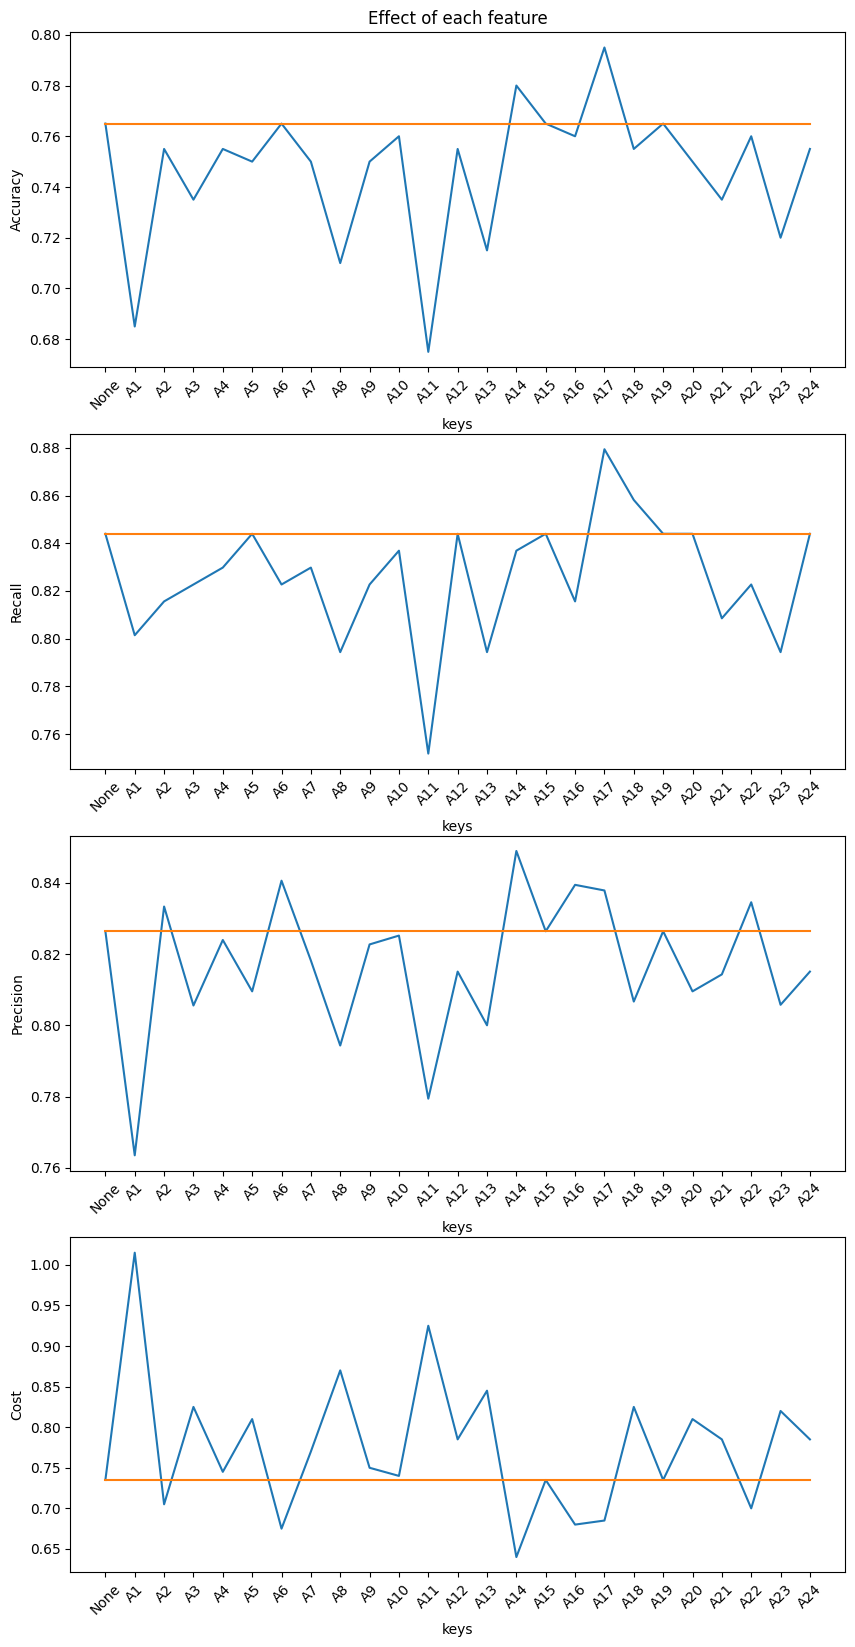

In [54]:
fig, axs = plt.subplots(4, 1, figsize = (10, 20))

axs[0].plot(keys, acc)
axs[0].set_xlabel("keys")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Effect of each feature")
axs[0].plot(keys, [acc[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[0].set_xticklabels(keys, rotation = 45)
    
axs[1].plot(keys, re)
axs[1].set_xlabel("keys")
axs[1].set_ylabel("Recall")
axs[1].plot(keys, [re[0] for _ in range(len(re))], marker = '', label = 'Baseline')
axs[1].set_xticklabels(keys, rotation = 45)
    
axs[2].plot(keys, pre)
axs[2].set_xlabel("keys")
axs[2].set_ylabel("Precision")
axs[2].plot(keys, [pre[0] for _ in range(len(pre))], marker = '', label = 'Baseline')
axs[2].set_xticklabels(keys, rotation = 45)

axs[3].plot(keys, c)
axs[3].set_xlabel("keys")
axs[3].set_ylabel("Cost")
axs[3].plot(keys, [c[0] for _ in range(len(c))], marker = '', label = 'Baseline')
axs[3].set_xticklabels(keys, rotation = 45)